# Классификация текстов

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import random
random.seed(1228)
from sklearn.feature_extraction.text import *
from sklearn.metrics import *
from sklearn.pipeline import Pipeline
import re
from pymystem3 import Mystem
import numpy as np
import itertools
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

from nltk.stem.snowball import RussianStemmer
import seaborn as sns


Разбиение на тестовое и обучающее множество

In [2]:
m = Mystem()
regex = re.compile("[А-Яа-я]+")

def words_only(text, regex=regex):
    try:
        return " ".join(regex.findall(text))
    except:
        return ""

def lemmatize(text, mystem=m):
    try:
        return "".join(m.lemmatize(text)).strip()  
    except:
        return " "

def stemming(text, stemmer = RussianStemmer()):
    try:
        return " ".join([stemmer.stem(w) for w in text.split()])
    except:
        return " "



In [5]:
import pandas as pd

data = pd.read_csv('../data/lenta-ru-news_2018.csv', usecols = ['text', 'topic'])
data.dropna(subset=['text', 'topic'], inplace = True)

In [6]:
data.head()

,text,topic
0,Вице-премьер по социальным вопросам Татьяна Го...,Россия
1,Австрийские правоохранительные органы не предс...,Спорт
2,Сотрудники социальной сети Instagram проанализ...,Путешествия
3,С начала расследования российского вмешательст...,Мир
4,Хакерская группировка Anonymous опубликовала н...,Мир


In [13]:
corpus_sample_train = pd.DataFrame(columns=data.columns)
corpus_sample_test = pd.DataFrame(columns=data.columns)

for cl in data['topic'].unique():
    corpus_sample = data[data['topic']==cl]
    if len(corpus_sample) > 30:
        corpus_sample_train = corpus_sample_train.append(corpus_sample.iloc[:101,:])
        corpus_sample_test = corpus_sample_test.append(corpus_sample.iloc[100:150,:])
    elif len(corpus_sample) > 50:
        corpus_sample_train = corpus_sample_train.append(corpus_sample.iloc[:101,:])
        corpus_sample_test = corpus_sample_test.append(corpus_sample.iloc[100:150,:])

In [8]:
?TfidfVectorizer

In [14]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier

clf = Pipeline([
    ('vect', CountVectorizer(analyzer = 'char', ngram_range={4,6})),
    ('clf', RandomForestClassifier()),
])


clf.fit(corpus_sample_train['text'], corpus_sample_train['topic'])

Pipeline(memory=None,
     steps=[('vect', CountVectorizer(analyzer='char', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range={4, 6}, preprocessor=None, stop_words=None,
        strip...obs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False))])

In [15]:
true = corpus_sample_test['topic']
predictions = clf.predict(corpus_sample_test['text'])

Precision:   0.54
Recall:   0.54
F1-measure:   0.52
Accuracy:   0.58
                   precision    recall  f1-score   support

   69-я параллель       0.47      0.78      0.59        50
      Бывший СССР       0.59      0.82      0.69        50
              Дом       0.60      0.78      0.68        50
         Из жизни       0.47      0.68      0.55        50
   Интернет и СМИ       0.37      0.34      0.35        50
             Крым       0.00      0.00      0.00         0
         Культура       0.73      0.66      0.69        50
              Мир       0.36      0.20      0.26        50
  Наука и техника       0.68      0.64      0.66        50
      Путешествия       0.73      0.66      0.69        50
           Россия       0.42      0.20      0.27        50
Силовые структуры       0.60      0.58      0.59        50
            Спорт       0.78      0.94      0.85        50
         Ценности       0.70      0.52      0.60        50
        Экономика       0.54      0.28      0

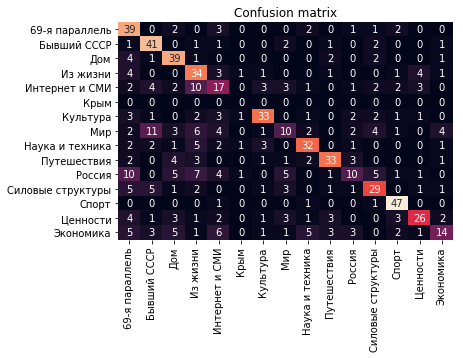

In [16]:
print("Precision: {0:6.2f}".format(precision_score(true, predictions, average='macro')))
print("Recall: {0:6.2f}".format(recall_score(true, predictions, average='macro')))
print("F1-measure: {0:6.2f}".format(f1_score(true, predictions, average='macro')))
print("Accuracy: {0:6.2f}".format(accuracy_score(true, predictions)))
print(classification_report(true, predictions))
labels = clf.classes_



labels = clf.classes_
sns.heatmap(data=confusion_matrix(true, predictions), annot=True, fmt="d", cbar=False, xticklabels=labels, yticklabels=labels)
plt.title("Confusion matrix")
plt.show()